In [32]:
!pip3 install textblob

     |████████████████████████████████| 636 kB 5.8 MB/s eta 0:00:01


In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from textblob import TextBlob

In [2]:
digital = pd.read_csv("final-digital.csv") 

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
physical = pd.read_csv("final-physical.csv") 

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
physical["year"] = physical.apply(lambda x: x["reviewTime"][-4:], axis=1)

In [5]:
### distribution throughout the years for both for reviews
digital["year"] = digital.apply(lambda x: x["reviewTime"][-4:], axis=1)

Text(0.5, 0.01, 'Reviews (Count)')

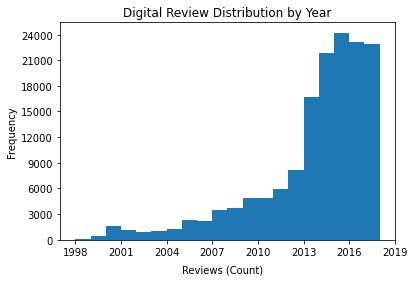

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

for axis in [axes.xaxis, axes.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

digital["year"].astype(int).plot(kind='hist', bins = 20, ax = axes, title='Digital Review Distribution by Year')
fig.text(0.5, 0.01, 'Reviews (Count)', ha='center')

In [7]:
physical.head()

,category,description,title,also_buy,brand,feature,rank,also_view,price,asin,verified,reviewText,overall,reviewTime,summary,vote,style,year
0,"CDs & Vinyl, Christian",NaN,Songs for the Shepherd,"B0016CP2GS, B0000075PB, B0000275QQ, B00000I7JO...",Keith Green,NaN,"123,896 in CDs & Vinyl (","B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZRM...",NaN,0001393774,True,I love this CD. So inspiring!,5.0,"04 29, 2016",Five Stars,0,NaN,2016
1,"CDs & Vinyl, Christian",NaN,Songs for the Shepherd,"B0016CP2GS, B0000075PB, B0000275QQ, B00000I7JO...",Keith Green,NaN,"123,896 in CDs & Vinyl (","B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZRM...",NaN,0001393774,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,0,NaN,2016
2,"CDs & Vinyl, Christian",NaN,Songs for the Shepherd,"B0016CP2GS, B0000075PB, B0000275QQ, B00000I7JO...",Keith Green,NaN,"123,896 in CDs & Vinyl (","B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZRM...",NaN,0001393774,True,I bought this on cassette tape in the 80's. So...,5.0,"04 19, 2016",I bought this on cassette tape in the 80's. ...,0,NaN,2016
3,"CDs & Vinyl, Christian",NaN,Songs for the Shepherd,"B0016CP2GS, B0000075PB, B0000275QQ, B00000I7JO...",Keith Green,NaN,"123,896 in CDs & Vinyl (","B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZRM...",NaN,0001393774,True,as good as i remember back when i bought the o...,5.0,"03 30, 2016",Five Stars,0,NaN,2016
4,"CDs & Vinyl, Christian",NaN,Songs for the Shepherd,"B0016CP2GS, B0000075PB, B0000275QQ, B00000I7JO...",Keith Green,NaN,"123,896 in CDs & Vinyl (","B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZRM...",NaN,0001393774,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,0,NaN,2016


Text(0.5, 0.01, 'Reviews (Count)')

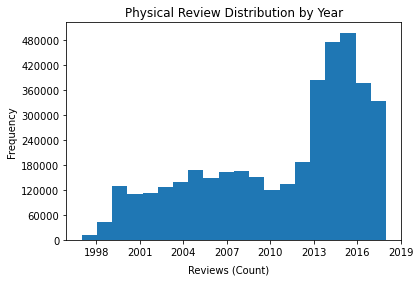

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

for axis in [axes.xaxis, axes.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

physical["year"].astype(int).plot(kind='hist', bins = 20, ax = axes, title='Physical Review Distribution by Year')
fig.text(0.5, 0.01, 'Reviews (Count)', ha='center')

Text(0.5, 0.01, 'Stars (Count)')

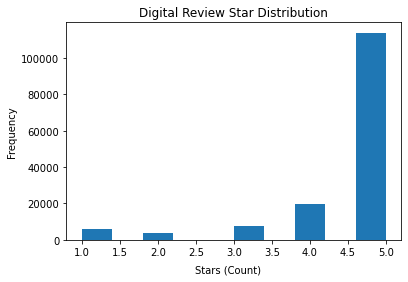

In [9]:
### distribution of star ratings
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

digital["overall"].astype(float).plot(kind='hist', ax = axes, title='Digital Review Star Distribution')
fig.text(0.5, 0.01, 'Stars (Count)', ha='center')

Text(0.5, 0.01, 'Stars (Count)')

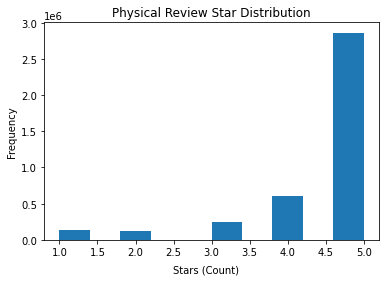

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

physical["overall"].astype(float).plot(kind='hist', ax = axes, title='Physical Review Star Distribution')
fig.text(0.5, 0.01, 'Stars (Count)', ha='center')

Text(0.5, 0.01, 'Votes (Count)')

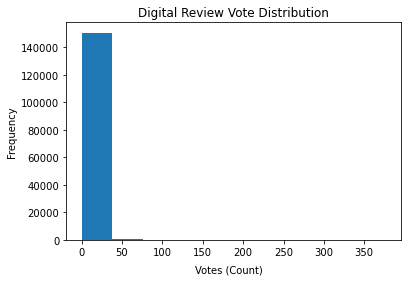

In [11]:
### distribution of votes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

digital["vote"].astype(int).plot(kind='hist', ax = axes, title='Digital Review Vote Distribution')
fig.text(0.5, 0.01, 'Votes (Count)', ha='center')

Will probably have to check of for power law distribution on this....

In [12]:
physical["vote"] = physical["vote"].astype(str)
physical["vote"] = physical.apply(lambda x: x["vote"].replace(",", "") if "," in x["vote"] else x["vote"], axis=1)

Text(0.5, 0.01, 'Votes (Count)')

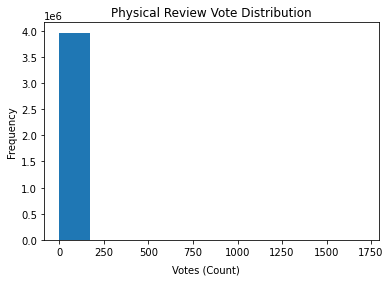

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
physical["vote"].astype(int).plot(kind='hist', ax = axes, title='Physical Review Vote Distribution')
fig.text(0.5, 0.01, 'Votes (Count)', ha='center')

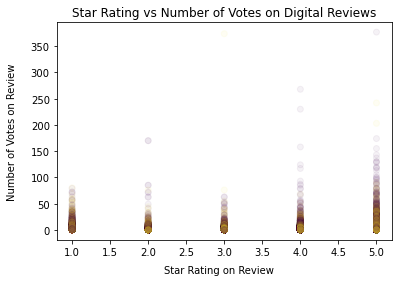

In [14]:
### relation between star ratings and votes

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

#temp1 = digital[digital["vote"].astype(int)]

plt.scatter(digital["overall"], digital["vote"].astype(int), c=digital["verified"], cmap= "viridis", alpha=0.05)

plt.title('Star Rating vs Number of Votes on Digital Reviews', x=0.5, y=1, ha='center')
fig.text(0.5, 0.01, 'Star Rating on Review', ha='center')
fig.text(0.01, 0.5, 'Number of Votes on Review', va='center', rotation='vertical')

plt.show()

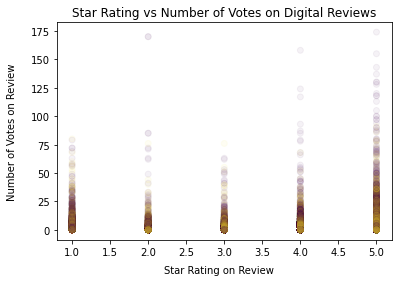

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

temp1 = digital[digital["vote"].astype(int) <= 200]

plt.scatter(temp1["overall"], temp1["vote"].astype(int), c=temp1["verified"], cmap= "viridis", alpha=0.05)

plt.title('Star Rating vs Number of Votes on Digital Reviews', x=0.5, y=1, ha='center')
fig.text(0.5, 0.01, 'Star Rating on Review', ha='center')
fig.text(0.01, 0.5, 'Number of Votes on Review', va='center', rotation='vertical')

plt.show()

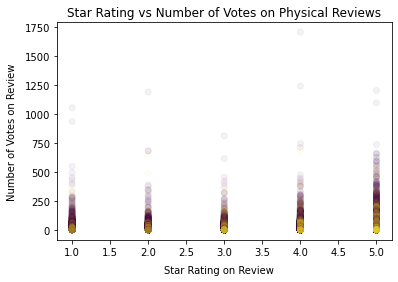

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

plt.scatter(physical["overall"], physical["vote"].astype(int), c=physical["verified"], cmap= "viridis", alpha=0.05)

plt.title('Star Rating vs Number of Votes on Physical Reviews', x=0.5, y=1, ha='center')
fig.text(0.5, 0.01, 'Star Rating on Review', ha='center')
fig.text(0.01, 0.5, 'Number of Votes on Review', va='center', rotation='vertical')

plt.show()

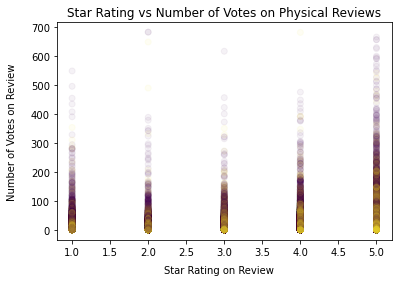

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

temp2 = physical[physical["vote"].astype(int) <= 700]

plt.scatter(temp2["overall"], temp2["vote"].astype(int), c=temp2["verified"], cmap= "viridis", alpha=0.05)

plt.title('Star Rating vs Number of Votes on Physical Reviews', x=0.5, y=1, ha='center')
fig.text(0.5, 0.01, 'Star Rating on Review', ha='center')
fig.text(0.01, 0.5, 'Number of Votes on Review', va='center', rotation='vertical')

plt.show()

In [ ]:
### qqplot for star distribution between physical and digital

In [ ]:
### chi square for the music categories in the physical section

In [1]:
### how many verified votes between the two 

In [ ]:
### chi square for verified votes for the two

In [ ]:
### simple sentiment analysis for the digital group and physical group

In [19]:
physical['text_sentiment'] = physical[['reviewText']].applymap(lambda x: TextBlob(x).sentiment.polarity if type(x) == str else None)

In [22]:
physical['summary_sentiment'] = physical[['summary']].applymap(lambda x: TextBlob(x).sentiment.polarity if type(x) == str else None)

In [27]:
digital['text_sentiment'] = digital[['reviewText']].applymap(lambda x: TextBlob(x).sentiment.polarity if type(x) == str else None)

In [28]:
digital['summary_sentiment'] = digital[['summary']].applymap(lambda x: TextBlob(x).sentiment.polarity if type(x) == str else None)

Text(0.5, 0.01, 'Stars (Count)')

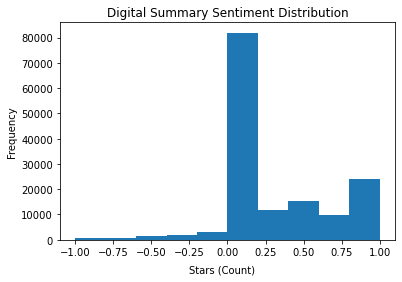

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

digital["summary_sentiment"].plot(kind='hist', ax = axes, title='Digital Summary Sentiment Distribution')
fig.text(0.5, 0.01, 'Sentiment (Polarity)', ha='center')

Text(0.5, 0.01, 'Sentiment (Polarity)')

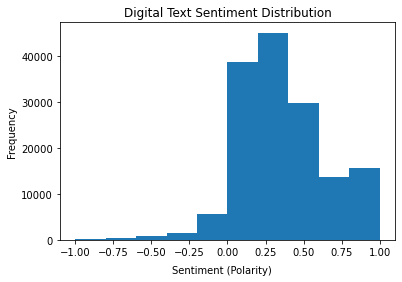

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

digital["text_sentiment"].plot(kind='hist', ax = axes, title='Digital Text Sentiment Distribution')
fig.text(0.5, 0.01, 'Sentiment (Polarity)', ha='center')

Text(0.5, 0.01, 'Sentiment (Polarity)')

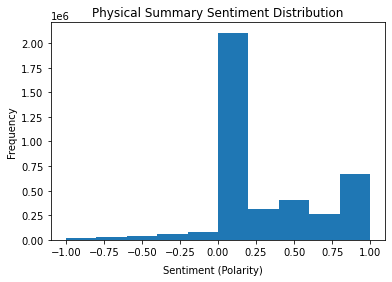

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

physical["summary_sentiment"].plot(kind='hist', ax = axes, title='Physical Summary Sentiment Distribution')
fig.text(0.5, 0.01, 'Sentiment (Polarity)', ha='center')

Text(0.5, 0.01, 'Sentiment (Polarity)')

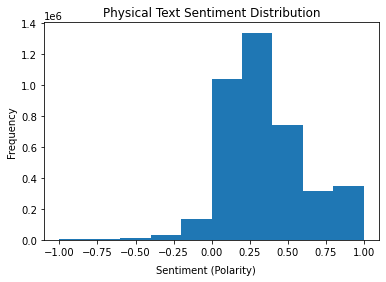

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

physical["text_sentiment"].plot(kind='hist', ax = axes, title='Physical Text Sentiment Distribution')
fig.text(0.5, 0.01, 'Sentiment (Polarity)', ha='center')

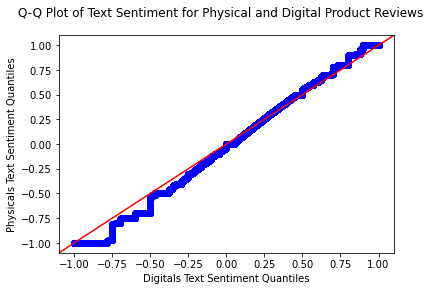

In [35]:
qq_phys = sm.ProbPlot(physical["text_sentiment"])
qq_dig = sm.ProbPlot(digital["text_sentiment"])
fig = qqplot_2samples(qq_phys, qq_dig, line='45', xlabel='Physicals Text Sentiment Quantiles', ylabel='Digitals Text Sentiment Quantiles')
plt.suptitle('Q-Q Plot of Text Sentiment for Physical and Digital Product Reviews')
plt.show()

The distribution is relatively the same between the physical and digital reviews. There may be a slight right skew in the reviews for physical products.

In [ ]:
### is there a way to notice different writing complexity between the groups?